<a href="https://colab.research.google.com/github/Gabriel-data/Python_Modelos_para_Tratar_e_Preparar_Dados/blob/main/01_01_Tratamento_e_Prepara%C3%A7%C3%A3o_Dados_Produtos20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO: Analisar, tratar e preparar um Dataset para Análise de Dados.

0. Preparação do ambiente (carga de dados).

1. Analisar a estrutura de base de dados.

  *   Tabela de Produtos (SKU, Título, Categoria, Valor de Custo, Preço à Vista, Preço a Prazo, Estado, Vendedor etc.)

2. Identificar e tratar valores Nulos e vazios.

3. Identificar e Tratar os tipos de campos (atributos)

4. Remover linhas e colunas do Dataset

5. Gerando um gráfico de Categorias

6. Gerar (exportar) novo Dataset tratado.

# Preparação do ambiente (carga de dados).

Carregar Bibliotecas

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Carregar base de dados

In [8]:
### Montar o Drive
from google.colab import drive
drive.mount('/content/drive/MyDrive/A-Colab_Note_2')

Mounted at /content/drive/MyDrive/A-Colab_Note_2


In [6]:
## Alternativa para Montar o Drive
import os
#pasta = "/content/drive/MyDrive"
pasta = "/content/drive/MyDrive/A-Colab_Note_2"
if not os.path.exists(pasta):
  os.makedirs(pasta)

In [19]:
# CARREGAR O DATASET em formato Excel, tipo de arquivo .XLSX.

# O arquivo na origem possui mais de uma planilha, por isso foi acrescentado um direcionamento para a Lista1.

dados = pd.read_excel('/content/drive/MyDrive/A-Colab_Note_2/MyDrive/A-Colab_Note_2/z_Bases/Lista_20_Produtos_Isol.xlsx', sheet_name='Lista1')

# 1. Analisar a estrutura de base de dados

### Apresentação do DATASET: Lista_20_Produtos_Isol.xlsx

Produto (SKU), Título, Marca, Categoria, Valor de Custo, Preço de Venda, Estoques, Armazém, Filial e Tabela.


In [24]:
# Primeiros 10 registros

dados.head()

,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,FILIAL,TABELA,Estado,Pais,Pedido,Data_Movimento,Vendedor
0,XYZ102030,Item 1,Amazon,Eletronico,300,450.0,495.0,10,3000,4500,18,RS,Rio Grande do Sul,Brasil,214401,2024-12-09,Cleber
1,XYZ102031,Item 2,NaN,Eletronico,650,975.0,1072.5,20,13000,19500,18,RS,Rio Grande do Sul,Brasil,540247,2023-08-10,Fonseca
2,XYZ102032,Item 3,Google,Internet,900,1350.0,1485.0,30,27000,40500,17,SP,São Paulo,Brasil,367707,2022-12-18,Ana
3,XYZ102033,Item 4,Microsoft,Software,6500,9750.0,10725.0,10,65000,97500,2,DF,Distrito Federal,Brasil,529998,2024-07-12,Paulo
4,XYZ102034,Item 5,Amazon,Eletronico,650,975.0,1072.5,50,32500,48750,18,RS,Rio Grande do Sul,Brasil,42227,2022-02-16,Diego


##### Estrutura do DATASET (Entidade)


In [25]:
# O número total de linhas é 20 e o número total de colunas é 17.

# Resultado: afirmativo. De acordo com a validação do arquivo XLSX que foi realizado antecipadamente a carga.

dados.shape

(20, 17)

## 2. Identificar e tratar valores Nulos e vazios.

In [30]:
################ Opção [1]: Verifique se há valores em branco em todas as colunas
valores_em_branco = dados.isnull()

#print(valores_em_branco)

################ Opção [2]: Verifique se há valores em branco em pelo menos uma coluna

linhas_com_branco = valores_em_branco.any(axis=1)

#print(linhas_com_branco)


#### Opção [3]: Se você quiser ver as linhas com valores em branco
linhas_com_valores_em_branco = dados[linhas_com_branco]

print(linhas_com_valores_em_branco)

          SKU   TITULO   MARCA   CATEGORIA  VALOR_CUSTO  PRECO_VISTA  \
1   XYZ102031   Item 2     NaN  Eletronico          650        975.0   
19  ABC102049  Item 20  Nestle    Nutrição          100          NaN   

    PRECO_PRAZO  ESTOQUE  TOTAL_VLR_CUSTO  TOTAL_VLR_VENDA  FILIAL TABELA  \
1        1072.5       20            13000            19500      18     RS   
19        165.0      200            20000                0       1    NaN   

               Estado    Pais  Pedido Data_Movimento Vendedor  
1   Rio Grande do Sul  Brasil  540247     2023-08-10  Fonseca  
19          São Paulo  Brasil  234984     2024-06-08  Fonseca  


In [31]:
##### [1] ###### Preenchimento de registros em branco p/ Coluna: aplica-se a todas as linhas vazias.

#dados['MARCA'] = dados['MARCA'].fillna('Oracle')

##### [2] ###### Preenchimento de registros em branco p/ Coluna/linha ESPECÍFICA
dados.at[1, 'MARCA'] = 'IBM'
dados.at[19, 'PRECO_VISTA'] = '1500'
dados.at[19, 'TABELA'] = 'SP'
#dados.at[1, 'CATEGORIA'] = 'Eletronico'

## Exibir linhas específicas
dados.iloc[[1,19]]

<ipython-input-31-608c8d0d8619>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1500' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dados.at[19, 'PRECO_VISTA'] = '1500'


,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,FILIAL,TABELA,Estado,Pais,Pedido,Data_Movimento,Vendedor
1,XYZ102031,Item 2,IBM,Eletronico,650,975.0,1072.5,20,13000,19500,18,RS,Rio Grande do Sul,Brasil,540247,2023-08-10,Fonseca
19,ABC102049,Item 20,Nestle,Nutrição,100,1500,165.0,200,20000,0,1,SP,São Paulo,Brasil,234984,2024-06-08,Fonseca


In [32]:
# REVISÃO 2: restam registros de linhas em branco e foi verificado que estas duas linhas podem ser removidas.

#### Opção [3]: Se você quiser ver as linhas com valores em branco
linhas_com_valores_em_branco = dados[linhas_com_branco]

print(linhas_com_valores_em_branco)

          SKU   TITULO   MARCA   CATEGORIA  VALOR_CUSTO PRECO_VISTA  \
1   XYZ102031   Item 2     IBM  Eletronico          650       975.0   
19  ABC102049  Item 20  Nestle    Nutrição          100        1500   

    PRECO_PRAZO  ESTOQUE  TOTAL_VLR_CUSTO  TOTAL_VLR_VENDA  FILIAL TABELA  \
1        1072.5       20            13000            19500      18     RS   
19        165.0      200            20000                0       1     SP   

               Estado    Pais  Pedido Data_Movimento Vendedor  
1   Rio Grande do Sul  Brasil  540247     2023-08-10  Fonseca  
19          São Paulo  Brasil  234984     2024-06-08  Fonseca  


## 3. Identificar e Tratar os tipos de campos (atributos)


In [33]:
# Identificação de tipos de campo:
dados.dtypes

### De/Para de tipos de campo:
    # object: strings
    # int64: inteiros
    # float64: reais
    # complex: complexos

### PERGUNTAS A SEREM RESPONDIDAS?

    # Existem tipos de campos irregulares? Sim.

    # Quais os campos passíveis de ajustes e para quais tipos? Sim, PRECO_VISTA e PRECO_PRAZO

    # Algum campo é desnecessário e pode ser removido? Quais? Não.


,0
SKU,object
TITULO,object
MARCA,object
CATEGORIA,object
VALOR_CUSTO,int64
PRECO_VISTA,object
PRECO_PRAZO,float64
ESTOQUE,int64
TOTAL_VLR_CUSTO,int64
TOTAL_VLR_VENDA,int64


In [34]:
# Tratamento (conversão) de tipos de Campos:

# Convertendo para float
dados['PRECO_VISTA'] = dados['PRECO_VISTA'].astype('int64')
dados['PRECO_PRAZO'] = dados['PRECO_PRAZO'].astype('int64')
#dados['TOTAL_VLR_CUSTO	'] = dados['TOTAL_VLR_CUSTO	'].astype('int64')

# Consulta após conversão dos tipos
print(dados.dtypes)


SKU                        object
TITULO                     object
MARCA                      object
CATEGORIA                  object
VALOR_CUSTO                 int64
PRECO_VISTA                 int64
PRECO_PRAZO                 int64
ESTOQUE                     int64
TOTAL_VLR_CUSTO             int64
TOTAL_VLR_VENDA             int64
FILIAL                      int64
TABELA                     object
Estado                     object
Pais                       object
Pedido                      int64
Data_Movimento     datetime64[ns]
Vendedor                   object
dtype: object


In [36]:
# Revisão completa do dataset
dados.head(20)

,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,FILIAL,TABELA,Estado,Pais,Pedido,Data_Movimento,Vendedor
0,XYZ102030,Item 1,Amazon,Eletronico,300,450,495,10,3000,4500,18,RS,Rio Grande do Sul,Brasil,214401,2024-12-09,Cleber
1,XYZ102031,Item 2,IBM,Eletronico,650,975,1072,20,13000,19500,18,RS,Rio Grande do Sul,Brasil,540247,2023-08-10,Fonseca
2,XYZ102032,Item 3,Google,Internet,900,1350,1485,30,27000,40500,17,SP,São Paulo,Brasil,367707,2022-12-18,Ana
3,XYZ102033,Item 4,Microsoft,Software,6500,9750,10725,10,65000,97500,2,DF,Distrito Federal,Brasil,529998,2024-07-12,Paulo
4,XYZ102034,Item 5,Amazon,Eletronico,650,975,1072,50,32500,48750,18,RS,Rio Grande do Sul,Brasil,42227,2022-02-16,Diego
5,XYZ102035,Item 6,Mastercard,Serviço,650,975,1072,60,39000,58500,1,MG,Minas Gerais,Brasil,429278,2023-06-22,Sônia
6,XYZ102036,Item 7,Google,Internet,990,1485,1633,70,69300,103950,17,SP,São Paulo,Brasil,390903,2022-07-12,Cleber
7,XYZ102037,Item 8,Microsoft,Software,650,975,1072,80,52000,78000,2,DF,Distrito Federal,Brasil,74825,2022-04-24,Fonseca
8,XYZ102038,Item 9,Dove,Beleza,300,450,495,90,27000,40500,19,PR,Paraná,Brasil,113354,2023-11-01,Ana
9,ABC102039,Item 10,Dove,Beleza,300,450,495,100,30000,45000,19,PR,Paraná,Brasil,306315,2023-11-08,Paulo


## 4. Remover linhas e colunas do Dataset ##


Remover linhas

In [ ]:
# Remoção de linhas inteiras

dados1 = dados1.drop([16,17])

dados1.head(20)

Remover colunas

In [42]:
# Remoçao de campos (colunas) desnecessárias:

dados1 = dados1.drop(columns=['FILIAL', 'TABELA'])

In [71]:
## Exibir um número determinado de linhas iniciando da linha zero
#dados.head(10)

## Exibir entre linhas
#dados.iloc[1:20]

## Exibir linhas e colunas específicas
#dados1.iloc[[2,5,17], [0,1,2,5]]

## Exibir colunas específicas
#print(dados.iloc[:, [2, 6]])
#dados.iloc[:, [2, 6]]

## Exibir linhas específicas
dados.iloc[[2,19]]

,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,FILIAL,TABELA,Estado,Pais,Pedido,Data_Movimento,Vendedor
2,XYZ102032,Item 3,Google,Internet,900,1350,1485,30,27000,40500,17,SP,São Paulo,Brasil,367707,2022-12-18,Ana
19,ABC102049,Item 20,Nestle,Nutrição,100,1500,165,200,20000,0,1,SP,São Paulo,Brasil,234984,2024-06-08,Fonseca


In [72]:
# Validar remoções

dados1.head()

,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,Estado,Pais,Pedido,Data_Movimento,Vendedor
0,XYZ102030,Item 1,Amazon,Eletronico,300,450,495,10,3000,4500,Rio Grande do Sul,Brasil,214401,2024-12-09,Cleber
1,XYZ102031,Item 2,IBM,Eletronico,650,975,1072,20,13000,19500,Rio Grande do Sul,Brasil,540247,2023-08-10,Fonseca
2,XYZ102032,Item 3,Google,Internet,900,1350,1485,30,27000,40500,São Paulo,Brasil,367707,2022-12-18,Ana
3,XYZ102033,Item 4,Microsoft,Software,6500,9750,10725,10,65000,97500,Distrito Federal,Brasil,529998,2024-07-12,Paulo
4,XYZ102034,Item 5,Amazon,Eletronico,650,975,1072,50,32500,48750,Rio Grande do Sul,Brasil,42227,2022-02-16,Diego


## 5. Gerando um gráfico de Categorias ##

*  Gráfico de coluna horizontal
*  Representa a contagem de ocorrências de categorias por produtos



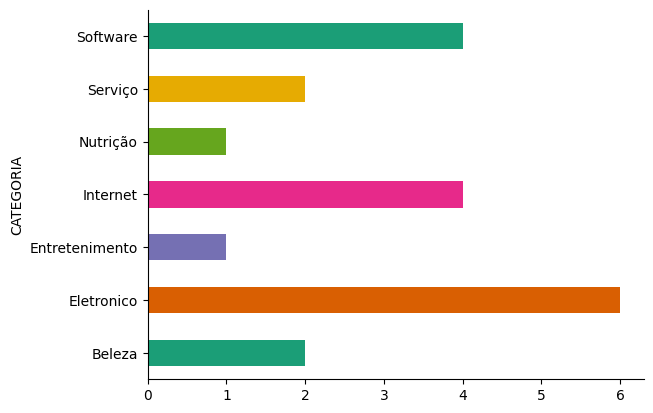

In [73]:
# @title CATEGORIA

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('CATEGORIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 6. Gerar novo Dataset tratado.



*   Exportar


In [77]:
# Criar cópia renomeada do Dataset

#dados2 = dados1.copy()  # Faz uma cópia do DataFrame original

dados2.head(20)

,SKU,TITULO,MARCA,CATEGORIA,VALOR_CUSTO,PRECO_VISTA,PRECO_PRAZO,ESTOQUE,TOTAL_VLR_CUSTO,TOTAL_VLR_VENDA,Estado,Pais,Pedido,Data_Movimento,Vendedor
0,XYZ102030,Item 1,Amazon,Eletronico,300,450,495,10,3000,4500,Rio Grande do Sul,Brasil,214401,2024-12-09,Cleber
1,XYZ102031,Item 2,IBM,Eletronico,650,975,1072,20,13000,19500,Rio Grande do Sul,Brasil,540247,2023-08-10,Fonseca
2,XYZ102032,Item 3,Google,Internet,900,1350,1485,30,27000,40500,São Paulo,Brasil,367707,2022-12-18,Ana
3,XYZ102033,Item 4,Microsoft,Software,6500,9750,10725,10,65000,97500,Distrito Federal,Brasil,529998,2024-07-12,Paulo
4,XYZ102034,Item 5,Amazon,Eletronico,650,975,1072,50,32500,48750,Rio Grande do Sul,Brasil,42227,2022-02-16,Diego
5,XYZ102035,Item 6,Mastercard,Serviço,650,975,1072,60,39000,58500,Minas Gerais,Brasil,429278,2023-06-22,Sônia
6,XYZ102036,Item 7,Google,Internet,990,1485,1633,70,69300,103950,São Paulo,Brasil,390903,2022-07-12,Cleber
7,XYZ102037,Item 8,Microsoft,Software,650,975,1072,80,52000,78000,Distrito Federal,Brasil,74825,2022-04-24,Fonseca
8,XYZ102038,Item 9,Dove,Beleza,300,450,495,90,27000,40500,Paraná,Brasil,113354,2023-11-01,Ana
9,ABC102039,Item 10,Dove,Beleza,300,450,495,100,30000,45000,Paraná,Brasil,306315,2023-11-08,Paulo


In [75]:
# Exportando dados tratados para arquivo de Excel:

dados2.to_excel('/content/drive/MyDrive/A-Colab_Note_2/MyDrive/A-Colab_Note_2/z_Bases/Bases_Tratadas/Lista_20_Prod-Tratada_230325.xlsx', index=False)

In [76]:
# Exportando dados tratados para arquivo de CSV:

dados2.to_csv('/content/drive/MyDrive/A-Colab_Note_2/MyDrive/A-Colab_Note_2/z_Bases/Bases_Tratadas/Lista_20_Prod-Tratada_250325.CSV', index=False)

Próximo tema (PREVISTO):
Validar regras de negócios quanto aos Preços.
  - Revisar cálculos de Margem e Totalizadores de preços
  - Utilizar operadores matemáticos
  - Criar novos campos
  - Recálcular Preços

Obrigado por acompanhar até aqui!

Fim!